In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [58]:
import urllib
import ast

### Data

In [69]:
# ove the downloaded data to PUI data
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/ys3226/PUIDATA


In [70]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ys3226/PUIDATA


In [64]:
urllib.request.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip', 'zipcode.gz')
!mv zipcode.gz $PUIDATA
!unzip -o $PUIDATA/zipcode.gz -d $PUIDATA/zipcode

Archive:  /nfshome/ys3226/PUIDATA/zipcode.gz
  inflating: /nfshome/ys3226/PUIDATA/zipcode/ZIP_CODE_040114.shx  
  inflating: /nfshome/ys3226/PUIDATA/zipcode/ZIP_CODE_040114.dbf  
  inflating: /nfshome/ys3226/PUIDATA/zipcode/ZIP_CODE_040114.prj  
  inflating: /nfshome/ys3226/PUIDATA/zipcode/ZIP_CODE_040114.sbn  
  inflating: /nfshome/ys3226/PUIDATA/zipcode/ZIP_CODE_040114.sbx  
  inflating: /nfshome/ys3226/PUIDATA/zipcode/ZIP_CODE_040114.shp  
  inflating: /nfshome/ys3226/PUIDATA/zipcode/ZIP_CODE_040114.shp.xml  


In [68]:
zip_list = ['/zbp00totals.zip',
            '/zbp01totals.zip',
            '/zbp02totals.zip',
            '/zbp03totals.zip',
            '/zbp04totals.zip',
            '/zbp05totals.zip',
            '/zbp06totals.zip',
            '/zbp07totals.zip',
            '/zbp08totals.zip',
            '/zbp09totals.zip',
            '/zbp10totals.zip',
            '/zbp11totals.zip',
            '/zbp12totals.zip',
            '/zbp13totals.zip',
            '/zbp94totals.zip',
            '/zbp95totals.zip',
            '/zbp96totals.zip',
            '/zbp97totals.zip',
            '/zbp98totals.zip',
            '/zbp99totals.zip']


for i in zip_list: 
    urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55' + i, 
                               'establish.gz')
    !mv establish.gz $PUIDATA
    !unzip -o $PUIDATA/establish.gz -d $PUIDATA/establish

Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp00totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp01totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp02totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp03totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp04totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp05totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp06totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp07totals.txt  
Archive:  /nfshome/ys3226/PUIDATA/establish.gz
  inflating: /nfshome/ys3226/PUIDATA/establish/zbp08total

In [101]:
import geopandas as gpd
nyczipsshp = gpd.GeoDataFrame.from_file("%s/zipcode/ZIP_CODE_040114.shp"%os.getenv("PUIDATA"))

In [102]:
nyczipsshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [103]:
zip_txt = ['/zbp00totals.txt',
            '/zbp01totals.txt',
            '/zbp02totals.txt',
            '/zbp03totals.txt',
            '/zbp04totals.txt',
            '/zbp05totals.txt',
            '/zbp06totals.txt',
            '/zbp07totals.txt',
            '/zbp08totals.txt',
            '/zbp09totals.txt',
            '/zbp10totals.txt',
            '/zbp11totals.txt',
            '/zbp12totals.txt',
            '/zbp13totals.txt',
            '/zbp94totals.txt',
            '/zbp95totals.txt',
            '/zbp96totals.txt',
            '/zbp97totals.txt',
            '/zbp98totals.txt',
            '/zbp99totals.txt']

for i in zip_txt:
    cbs = pd.read_csv("%s/establish/zbp00totals.txt"%os.getenv("PUIDATA"))


,ZIP,NAME,EMPFLAG,EMP,QP1,AP,EST
0,501,"HOLTSVILLE, NY",A,0,0,0,1
1,1001,"AGAWAM, MA",NaN,8042,59833,259661,493
2,1002,"AMHERST, MA",NaN,6547,36719,169658,563
3,1003,"AMHERST, MA",NaN,82,308,2482,13
4,1004,"AMHERST, MA",NaN,717,2049,5826,48


In [190]:
cbs94 = pd.read_csv("%s/establish/zbp94totals.txt"%os.getenv("PUIDATA"))
cbs95 = pd.read_csv("%s/establish/zbp95totals.txt"%os.getenv("PUIDATA"))
cbs96 = pd.read_csv("%s/establish/zbp96totals.txt"%os.getenv("PUIDATA"))
cbs97 = pd.read_csv("%s/establish/zbp97totals.txt"%os.getenv("PUIDATA"))
cbs98 = pd.read_csv("%s/establish/zbp98totals.txt"%os.getenv("PUIDATA"))
cbs99 = pd.read_csv("%s/establish/zbp99totals.txt"%os.getenv("PUIDATA"))
cbs00 = pd.read_csv("%s/establish/zbp00totals.txt"%os.getenv("PUIDATA"))
cbs01 = pd.read_csv("%s/establish/zbp01totals.txt"%os.getenv("PUIDATA"))
cbs02 = pd.read_csv("%s/establish/zbp02totals.txt"%os.getenv("PUIDATA"))
cbs03 = pd.read_csv("%s/establish/zbp03totals.txt"%os.getenv("PUIDATA"))
cbs04 = pd.read_csv("%s/establish/zbp04totals.txt"%os.getenv("PUIDATA"))
cbs05 = pd.read_csv("%s/establish/zbp05totals.txt"%os.getenv("PUIDATA"))
cbs06 = pd.read_csv("%s/establish/zbp06totals.txt"%os.getenv("PUIDATA"))
cbs07 = pd.read_csv("%s/establish/zbp07totals.txt"%os.getenv("PUIDATA"))
cbs08 = pd.read_csv("%s/establish/zbp08totals.txt"%os.getenv("PUIDATA"))
cbs09 = pd.read_csv("%s/establish/zbp09totals.txt"%os.getenv("PUIDATA"))
cbs10 = pd.read_csv("%s/establish/zbp10totals.txt"%os.getenv("PUIDATA"))
cbs11 = pd.read_csv("%s/establish/zbp11totals.txt"%os.getenv("PUIDATA"))
cbs12 = pd.read_csv("%s/establish/zbp12totals.txt"%os.getenv("PUIDATA"))
cbs13 = pd.read_csv("%s/establish/zbp13totals.txt"%os.getenv("PUIDATA"))

In [191]:
cbs98 = cbs98.rename(index=str, columns={"ZIP": "zip", "EST": "est"})
cbs99 = cbs99.rename(index=str, columns={"ZIP": "zip", "EST": "est"})
cbs00 = cbs00.rename(index=str, columns={"ZIP": "zip", "EST": "est"})
cbs01 = cbs01.rename(index=str, columns={"ZIP": "zip", "EST": "est"})
cbs02 = cbs02.rename(index=str, columns={"ZIP": "zip", "EST": "est"})

In [192]:
dfs = [cbs94[['zip', 'est']], cbs95[['zip', 'est']], cbs96[['zip', 'est']], cbs97[['zip', 'est']],
       cbs98[['zip', 'est']], cbs99[['zip', 'est']], cbs00[['zip', 'est']], cbs01[['zip', 'est']],
       cbs02[['zip', 'est']], cbs03[['zip', 'est']], cbs04[['zip', 'est']], cbs05[['zip', 'est']], 
       cbs06[['zip', 'est']], cbs07[['zip', 'est']], cbs08[['zip', 'est']], cbs09[['zip', 'est']],
       cbs10[['zip', 'est']], cbs11[['zip', 'est']], cbs12[['zip', 'est']], cbs13[['zip', 'est']]]

In [214]:
for i in range(20):
    dfs[i] = dfs[i].rename(columns={ dfs[i].columns[1]: 1994 + i })

In [299]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='zip'), dfs)

In [300]:
df_final.head()

,zip,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,1001,439,439,433,457,444,469,493,490,490,...,500,509,509,503,477,458,448,436,453,439
1,1002,450,467,487,500,490,558,563,587,566,...,584,589,582,596,584,571,570,558,572,572
2,1003,10,10,13,15,14,13,13,13,15,...,15,12,12,16,17,16,16,16,15,15
3,1004,47,48,47,41,31,35,48,37,23,...,43,31,30,20,18,18,21,19,16,16
4,1005,92,95,101,104,95,82,86,90,94,...,97,94,98,106,97,87,96,91,94,97


In [302]:
cbs = df_final.set_index('zip')
cbs.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
zip,,,,,,,,,,,,,,,,,,,,
1001,439,439,433,457,444,469,493,490,490,505,500,509,509,503,477,458,448,436,453,439
1002,450,467,487,500,490,558,563,587,566,586,584,589,582,596,584,571,570,558,572,572
1003,10,10,13,15,14,13,13,13,15,16,15,12,12,16,17,16,16,16,15,15
1004,47,48,47,41,31,35,48,37,23,21,43,31,30,20,18,18,21,19,16,16
1005,92,95,101,104,95,82,86,90,94,93,97,94,98,106,97,87,96,91,94,97


In [304]:
##the standardization
vals = ((cbs.T - cbs.mean(1)) / cbs.std(1)).T

In [305]:
vals.mean(axis=1).mean() #should return 0 (or something very small) everywhere

4.7961146745674379e-19

In [307]:
vals.std(axis=1).mean() #should return 1 everywhere

1.0

In [301]:
nyczipsshp['ZIPCODE'] = nyczipsshp['ZIPCODE'].astype(int)

In [309]:
cbs = nyczipsshp[['ZIPCODE', 'geometry']].merge(vals, left_on="ZIPCODE", right_index=True)

In [316]:
cbs = cbs.set_index('ZIPCODE')
cbs.head()

,geometry,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,"POLYGON ((981958.6472873986 213464.4530421346,...",-1.785254,-1.143543,-1.237276,-0.667668,0.053356,-0.098059,0.507600,-0.422520,-0.761401,...,0.889743,0.471549,1.214203,2.180374,1.625186,0.421078,-0.040377,-0.141321,-0.083639,0.190350
10002,"POLYGON ((991339.8703228086 207576.7837151289,...",-1.679191,-1.590586,-1.337429,-1.008325,-1.124777,-0.917188,-0.431127,0.242271,-0.451379,...,0.262524,0.594160,0.604286,0.601754,0.616944,0.829596,1.075158,1.176421,1.282747,1.368820
10003,"POLYGON ((989830.469142139 207048.1263078749, ...",-1.825115,-1.420351,-1.286545,-0.891817,-0.510470,-0.477019,-0.396735,-0.667692,-0.620860,...,-0.085636,0.218773,0.359269,0.827590,0.901184,0.994848,1.041680,1.195557,1.379540,1.590285
10004,"POLYGON ((977542.4500830621 188447.2783390433,...",-1.568159,-1.485188,-1.402216,-1.033455,-1.005797,-0.480312,0.082049,-0.351245,-0.295931,...,-0.019360,-0.231398,0.238773,0.782697,0.838011,0.865668,1.040830,1.096144,1.446468,1.787572
10004,"POLYGON ((971218.3702115566 190710.8587856293,...",-1.568159,-1.485188,-1.402216,-1.033455,-1.005797,-0.480312,0.082049,-0.351245,-0.295931,...,-0.019360,-0.231398,0.238773,0.782697,0.838011,0.865668,1.040830,1.096144,1.446468,1.787572


In [317]:
cbs.shape

(243, 21)

In [318]:
cbs.iloc[:, 1:].head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
ZIPCODE,,,,,,,,,,,,,,,,,,,,
10001,-1.785254,-1.143543,-1.237276,-0.667668,0.053356,-0.098059,0.507600,-0.422520,-0.761401,-1.172384,0.889743,0.471549,1.214203,2.180374,1.625186,0.421078,-0.040377,-0.141321,-0.083639,0.190350
10002,-1.679191,-1.590586,-1.337429,-1.008325,-1.124777,-0.917188,-0.431127,0.242271,-0.451379,-0.114680,0.262524,0.594160,0.604286,0.601754,0.616944,0.829596,1.075158,1.176421,1.282747,1.368820
10003,-1.825115,-1.420351,-1.286545,-0.891817,-0.510470,-0.477019,-0.396735,-0.667692,-0.620860,-0.326487,-0.085636,0.218773,0.359269,0.827590,0.901184,0.994848,1.041680,1.195557,1.379540,1.590285
10004,-1.568159,-1.485188,-1.402216,-1.033455,-1.005797,-0.480312,0.082049,-0.351245,-0.295931,-0.305150,-0.019360,-0.231398,0.238773,0.782697,0.838011,0.865668,1.040830,1.096144,1.446468,1.787572
10004,-1.568159,-1.485188,-1.402216,-1.033455,-1.005797,-0.480312,0.082049,-0.351245,-0.295931,-0.305150,-0.019360,-0.231398,0.238773,0.782697,0.838011,0.865668,1.040830,1.096144,1.446468,1.787572


### Clustering

In [242]:
from sklearn.cluster import KMeans

In [243]:
#kmeans with 5 clusters
km = KMeans(n_clusters=5, random_state=444)

In [319]:
km.fit(cbs.iloc[:, 1:])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=444, tol=0.0001,
    verbose=0)

In [320]:
km.labels_

array([3, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 2, 3, 3, 1, 3, 2, 1, 0, 1, 2, 1, 1,
       3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0, 2, 0, 3,
       2, 2, 1, 4, 4, 4, 1, 1, 1, 3, 0, 1, 3, 4, 1, 1, 1, 3, 1, 1, 4, 4, 4,
       4, 2, 1, 1, 0, 4, 1, 2, 0, 1, 1, 0, 1, 1, 4, 1, 1, 2, 3, 2, 3, 1, 3,
       1, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 3, 0, 0, 0, 4, 4, 0, 3, 0, 0, 0, 0, 4, 0,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 3, 3,
       3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int32)

In [321]:
predict=km.predict(cbs.iloc[:, 1:])
cbs['labels1'] = pd.Series(predict, index=cbs.index)

In [323]:
cbs.shape

(243, 22)

###### The trend of a single zipcode (the first one) from the label "0" throughout 20 years as an example 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


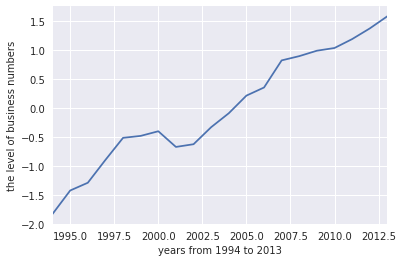

In [446]:
cbs[cbs['labels1'] == 0].iloc[1,1:21].plot()
plt.xlabel('years from 1994 to 2013', fontsize=10)
plt.ylabel('the level of business numbers', fontsize=10)
plt.show()

Figure 1: A representation of an increasing trend in the number of etablishments as an example of cluster "0"

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


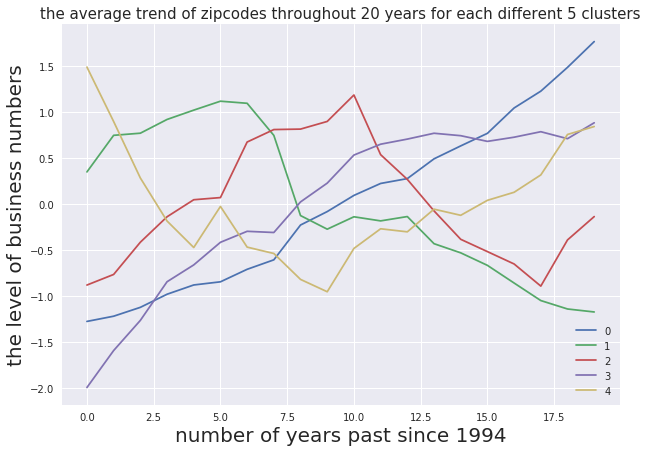

In [452]:
fig = plt.figure(figsize = (10,7))
for i in range(5):
    plt.plot(np.array(cbs[cbs['labels1'] == i].iloc[:,1:21].mean()), label = i)
    plt.legend()
plt.xlabel('number of years past since 1994', fontsize=20)
plt.ylabel('the level of business numbers', fontsize=20)
plt.title('the average trend of zipcodes throughout 20 years for each different 5 clusters', fontsize=15)
plt.show()

Figure 2: Showing average trends by zipcodes for each cluster throughout 20 years. For example, we can infer that the zipcodes captured by cluster '0'(blue line) are in an increasing trend, while the ones captured by cluster '1'(green line) are in a decreasing trend.

#### Visualizing K-means

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


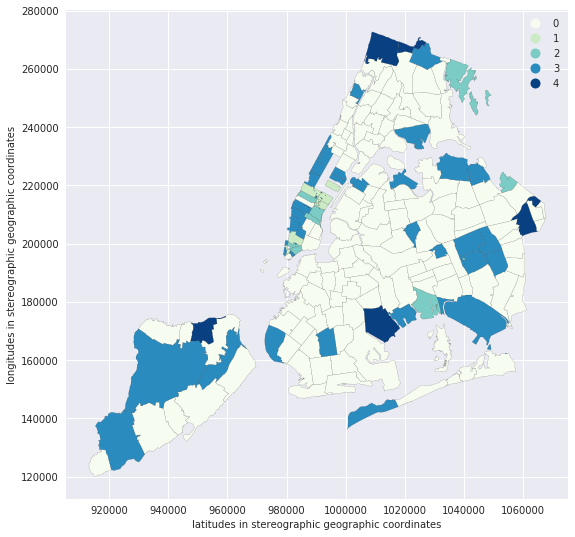

In [454]:
f, ax = plt.subplots(figsize=(9, 9))
cbs.plot(column='labels1', categorical=True, k=5, cmap='GnBu', linewidth=0.1, ax=ax, 
        edgecolor='black', legend=True)
plt.xlabel('latitudes in stereographic geographic coordinates', fontsize=10)
plt.ylabel('longitudes in stereographic geographic coordinates', fontsize=10)
plt.show()

Figure 3: Based on our avreage trend plot by clusters, we can say that most of the zipcode areas have been in an increasing trend(cluster 0) of the number of establishments. There are couple of ones having decreasing trends(cluster 1), and some other ones are also in an increasing trend(cluster 3) but in a more slower rate than cluster 1's.

### Agglomerative Clustering  

In [367]:
from sklearn.cluster import AgglomerativeClustering

In [393]:
agc = AgglomerativeClustering(n_clusters=7, linkage='average')
agc.fit(cbs.iloc[:, 1:])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=7, n_components=None,
            pooling_func=<function mean at 0x7f8bd4a9c840>)

In [394]:
agc.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 0, 2, 2, 4, 2, 0, 4, 2, 4, 0, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 4, 5, 1, 5, 4, 4, 4, 2, 2, 4, 2, 1, 4, 4, 4, 2, 4, 4, 5, 1, 5,
       1, 0, 4, 4, 2, 5, 4, 0, 2, 4, 4, 2, 4, 4, 1, 4, 4, 0, 2, 0, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 6, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [395]:
predict2=agc.fit_predict(cbs.iloc[:, 1:21])
cbs['labels2'] = pd.Series(predict2, index=cbs.index)

#### Visualizing Agglomerative

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


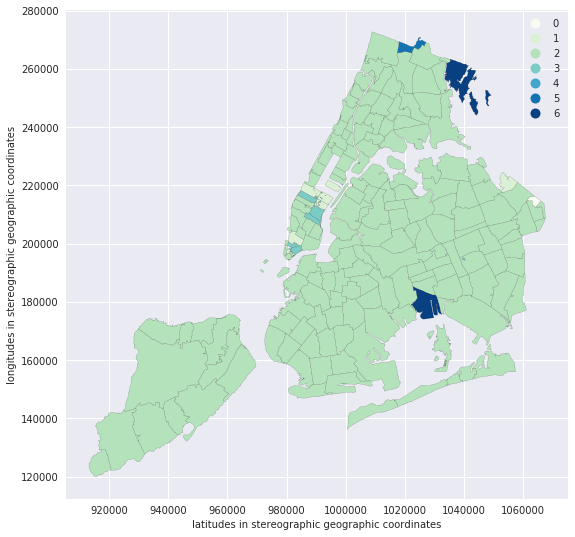

In [455]:
f, ax = plt.subplots(figsize=(9, 9))
cbs.plot(column='labels2', categorical=True, k=7, cmap='GnBu', linewidth=0.1, ax=ax, 
        edgecolor='black', legend=True)

plt.xlabel('latitudes in stereographic geographic coordinates', fontsize=10)
plt.ylabel('longitudes in stereographic geographic coordinates', fontsize=10)
plt.show()

Figure 4: The map of clustering after applying agglomarative clustering for k=7. 

### Comment: Although, this final map may require some further discovery in terms of the 7 clusters' trends, it gives an explicit idea anyway: Applying an agglomarative cluster with an increased number of k's did not give a meaningful clustering scheme. Because, almost all zones seem to be in the same cluster which does not give an insightful information.